## Import the Required Libraries

In [25]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [26]:
raw_data=pd.read_csv("Data/solar2022.csv")

In [27]:
raw_data.head()

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,Clearsky DHI Units,Clearsky DNI Units,Clearsky GHI Units,Dew Point Units,DHI Units,DNI Units,GHI Units,Solar Zenith Angle Units,Temperature Units,Pressure Units,Relative Humidity Units,Precipitable Water Units,Wind Direction Units,Wind Speed Units,Cloud Type -15,Cloud Type 0,Cloud Type 1,Cloud Type 2,Cloud Type 3,Cloud Type 4,Cloud Type 5,Cloud Type 6,Cloud Type 7,Cloud Type 8,Cloud Type 9,Cloud Type 10,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,223700,-,-,-,40.97,-4.54,1,895,1,w/m2,w/m2,w/m2,c,w/m2,w/m2,w/m2,Degree,c,mbar,%,cm,Degrees,m/s,NaN,Clear,Probably Clear,Fog,Water,Super-Cooled Water,Mixed,Opaque Ice,Cirrus,Overlapping,Overshooting,Unknown,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,4.0.0
1,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Relative Humidity,Pressure,Wind Direction,Wind Speed,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Surface Albedo,Fill Flag,Dew Point,Asymmetry,Aerosol Optical Depth,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,1,0,30,4.9,0,0,0,1,69.27,914,172,3.4000000000000004,0,0,0,159.08,1.4000000000000001,0.17,0,-0.30000000000000004,0.67,0.07100000000000001,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,1,1,30,5.2,0,0,0,4,57.26,918,183,1.6,0,0,0,161.96,0.5,0.16,0,-2.6,0.64,0.011,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,1,1,2,30,5.300000000000001,0,0,0,0,55.49,919,184,1.5,0,0,0,157,0.5,0.16,0,-2.9000000000000004,0.64,0.011,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data_info= raw_data.loc[0]

In [29]:
print(data_info)

Source                                         NSRDB
Location ID                                   223700
City                                               -
State                                              -
Country                                            -
Latitude                                       40.97
Longitude                                      -4.54
Time Zone                                          1
Elevation                                        895
Local Time Zone                                    1
Clearsky DHI Units                              w/m2
Clearsky DNI Units                              w/m2
Clearsky GHI Units                              w/m2
Dew Point Units                                    c
DHI Units                                       w/m2
DNI Units                                       w/m2
GHI Units                                       w/m2
Solar Zenith Angle Units                      Degree
Temperature Units                             

## Seperating the detils row and the data 

In [30]:
data=pd.read_csv("data/solar2022.csv",skiprows = 2)

In [31]:
data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Relative Humidity,Pressure,Wind Direction,Wind Speed,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Surface Albedo,Fill Flag,Dew Point,Asymmetry,Aerosol Optical Depth,Alpha
0,2022,1,1,0,30,4.9,0,0,0,1,69.27,914,172,3.4,0,0,0,159.08,1.4,0.17,0,-0.3,0.67,0.071,0.40
1,2022,1,1,1,30,5.2,0,0,0,4,57.26,918,183,1.6,0,0,0,161.96,0.5,0.16,0,-2.6,0.64,0.011,1.02
2,2022,1,1,2,30,5.3,0,0,0,0,55.49,919,184,1.5,0,0,0,157.00,0.5,0.16,0,-2.9,0.64,0.011,1.04
3,2022,1,1,3,30,5.3,0,0,0,0,54.39,919,184,1.5,0,0,0,147.66,0.5,0.16,0,-3.2,0.64,0.011,1.07
4,2022,1,1,4,30,5.3,0,0,0,4,53.39,919,184,1.4,0,0,0,136.82,0.5,0.16,0,-3.4,0.64,0.011,1.08


In [32]:
data.tail()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Relative Humidity,Pressure,Wind Direction,Wind Speed,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Surface Albedo,Fill Flag,Dew Point,Asymmetry,Aerosol Optical Depth,Alpha
8755,2022,12,31,19,30,6.2,0,0,0,3,66.17,914,176,3.5,0,0,0,106.46,1.4,0.17,0,0.4,0.67,0.052,0.31
8756,2022,12,31,20,30,5.7,0,0,0,4,68.11,915,174,3.4,0,0,0,117.52,1.4,0.17,0,0.3,0.67,0.055,0.32
8757,2022,12,31,21,30,5.3,0,0,0,4,69.63,915,173,3.2,0,0,0,128.81,1.4,0.17,0,0.2,0.67,0.060,0.32
8758,2022,12,31,22,30,5.0,0,0,0,1,70.24,914,173,3.3,0,0,0,140.02,1.4,0.17,0,0.0,0.67,0.064,0.34
8759,2022,12,31,23,30,4.9,0,0,0,8,69.86,914,172,3.4,0,0,0,150.59,1.4,0.17,0,-0.1,0.67,0.068,0.37


In [33]:
data.shape

(8760, 25)

In [34]:
data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Relative Humidity,Pressure,Wind Direction,Wind Speed,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Surface Albedo,Fill Flag,Dew Point,Asymmetry,Aerosol Optical Depth,Alpha
0,2022,1,1,0,30,4.9,0,0,0,1,69.27,914,172,3.4,0,0,0,159.08,1.4,0.17,0,-0.3,0.67,0.071,0.40
1,2022,1,1,1,30,5.2,0,0,0,4,57.26,918,183,1.6,0,0,0,161.96,0.5,0.16,0,-2.6,0.64,0.011,1.02
2,2022,1,1,2,30,5.3,0,0,0,0,55.49,919,184,1.5,0,0,0,157.00,0.5,0.16,0,-2.9,0.64,0.011,1.04
3,2022,1,1,3,30,5.3,0,0,0,0,54.39,919,184,1.5,0,0,0,147.66,0.5,0.16,0,-3.2,0.64,0.011,1.07
4,2022,1,1,4,30,5.3,0,0,0,4,53.39,919,184,1.4,0,0,0,136.82,0.5,0.16,0,-3.4,0.64,0.011,1.08


In [35]:
data.dtypes

Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
Temperature              float64
Clearsky DHI               int64
Clearsky DNI               int64
Clearsky GHI               int64
Cloud Type                 int64
Relative Humidity        float64
Pressure                   int64
Wind Direction             int64
Wind Speed               float64
DHI                        int64
DNI                        int64
GHI                        int64
Solar Zenith Angle       float64
Precipitable Water       float64
Surface Albedo           float64
Fill Flag                  int64
Dew Point                float64
Asymmetry                float64
Aerosol Optical Depth    float64
Alpha                    float64
dtype: object

## Combining the year, month, day, hour and minute as a single time stamp Feature

In [36]:
data['Timestamp']=pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [37]:
data.set_index('Timestamp', inplace=True)

In [38]:
data=data.sort_index()

In [39]:
data = data.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [40]:
data.head()

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Relative Humidity,Pressure,Wind Direction,Wind Speed,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Surface Albedo,Fill Flag,Dew Point,Asymmetry,Aerosol Optical Depth,Alpha
Timestamp,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,4.9,0,0,0,1,69.27,914,172,3.4,0,0,0,159.08,1.4,0.17,0,-0.3,0.67,0.071,0.40
2022-01-01 01:30:00,5.2,0,0,0,4,57.26,918,183,1.6,0,0,0,161.96,0.5,0.16,0,-2.6,0.64,0.011,1.02
2022-01-01 02:30:00,5.3,0,0,0,0,55.49,919,184,1.5,0,0,0,157.00,0.5,0.16,0,-2.9,0.64,0.011,1.04
2022-01-01 03:30:00,5.3,0,0,0,0,54.39,919,184,1.5,0,0,0,147.66,0.5,0.16,0,-3.2,0.64,0.011,1.07
2022-01-01 04:30:00,5.3,0,0,0,4,53.39,919,184,1.4,0,0,0,136.82,0.5,0.16,0,-3.4,0.64,0.011,1.08


## Data Preprocessing

In [41]:
data.isnull().sum()

Temperature              0
Clearsky DHI             0
Clearsky DNI             0
Clearsky GHI             0
Cloud Type               0
Relative Humidity        0
Pressure                 0
Wind Direction           0
Wind Speed               0
DHI                      0
DNI                      0
GHI                      0
Solar Zenith Angle       0
Precipitable Water       0
Surface Albedo           0
Fill Flag                0
Dew Point                0
Asymmetry                0
Aerosol Optical Depth    0
Alpha                    0
dtype: int64

In [43]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.describe()

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Relative Humidity,Pressure,Wind Direction,Wind Speed,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Surface Albedo,Fill Flag,Dew Point,Asymmetry,Aerosol Optical Depth,Alpha
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,13.501747,38.967237,370.407078,240.614155,2.901027,64.449428,910.432877,184.256279,2.454897,64.273516,206.956050,183.587900,89.662905,1.454726,0.192493,0.600571,5.160194,0.647534,0.079185,0.964078
std,9.172793,49.824015,405.005444,315.734227,3.098291,25.658662,5.348741,93.642800,1.474911,106.461261,341.518533,277.095836,35.650100,0.578794,0.021698,2.006423,4.504840,0.012385,0.082760,0.363276
min,-4.800000,0.000000,0.000000,0.000000,0.000000,6.510000,887.000000,1.000000,0.100000,0.000000,0.000000,0.000000,17.650000,0.200000,0.150000,0.000000,-11.600000,0.630000,0.010000,0.010000
25%,6.300000,0.000000,0.000000,0.000000,0.000000,43.570000,907.000000,122.000000,1.300000,0.000000,0.000000,0.000000,62.140000,1.100000,0.170000,0.000000,2.400000,0.640000,0.031000,0.770000
50%,12.100000,0.000000,0.000000,0.000000,1.000000,66.325000,911.000000,188.000000,2.100000,0.000000,0.000000,0.000000,89.205000,1.400000,0.200000,0.000000,5.800000,0.640000,0.055000,1.020000
75%,19.900000,71.000000,823.000000,469.000000,6.000000,87.960000,914.000000,260.000000,3.400000,84.000000,310.000000,323.000000,117.365000,1.800000,0.210000,0.000000,8.400000,0.660000,0.089000,1.200000
max,39.100000,343.000000,1027.000000,1031.000000,9.000000,100.000000,923.000000,360.000000,9.200000,544.000000,1027.000000,1031.000000,162.260000,3.500000,0.220000,8.000000,17.300000,0.670000,0.864000,1.980000


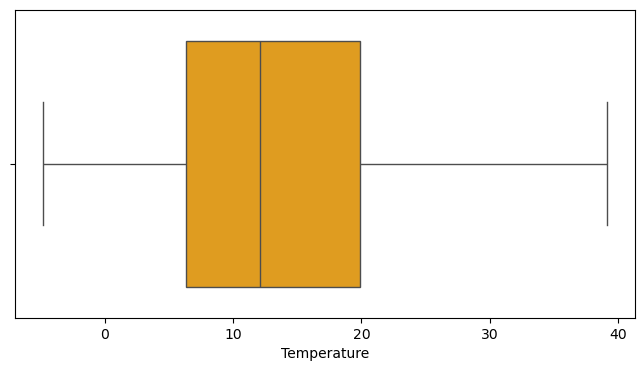

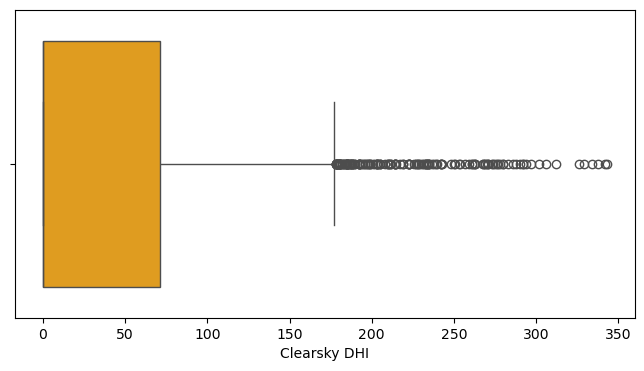

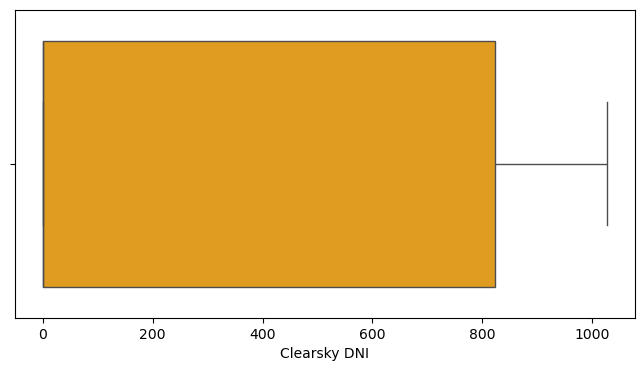

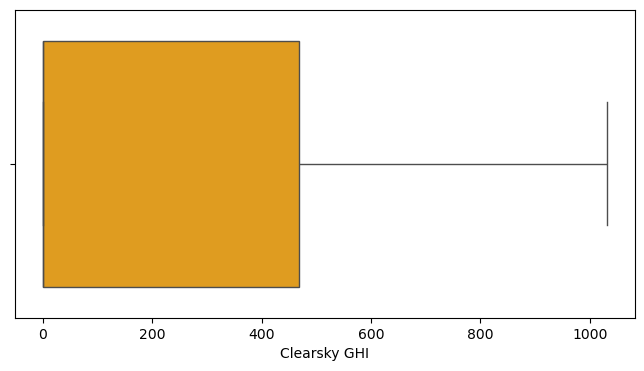

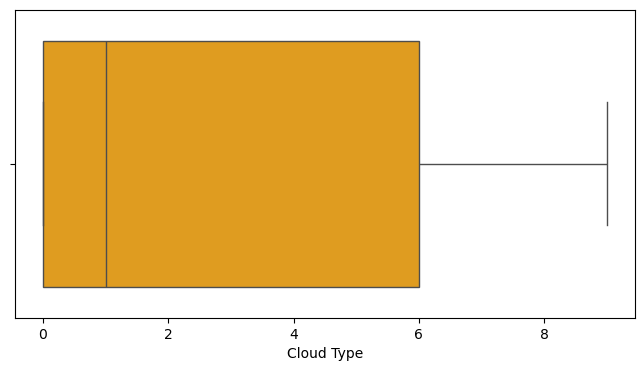

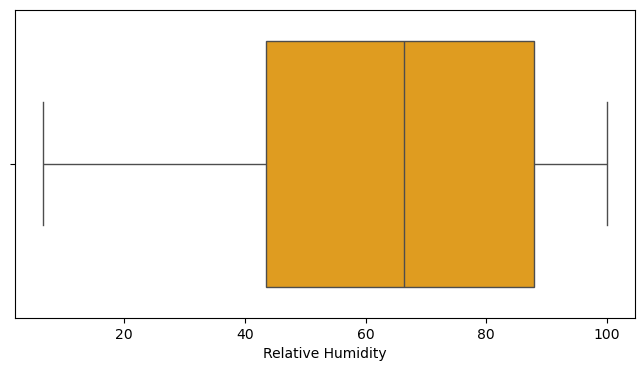

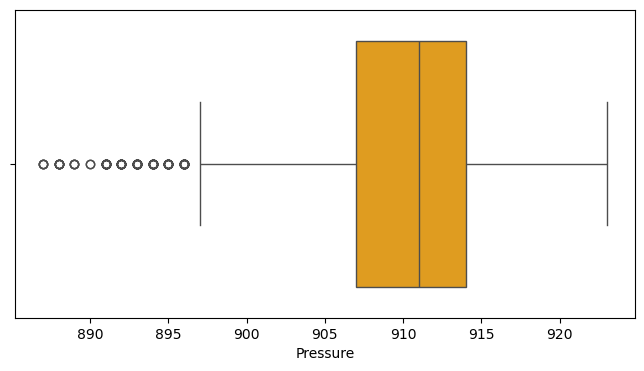

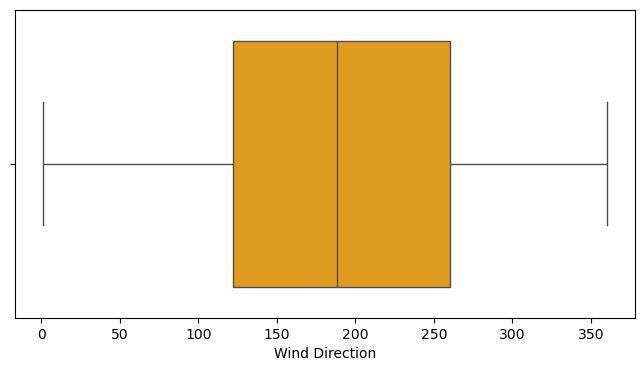

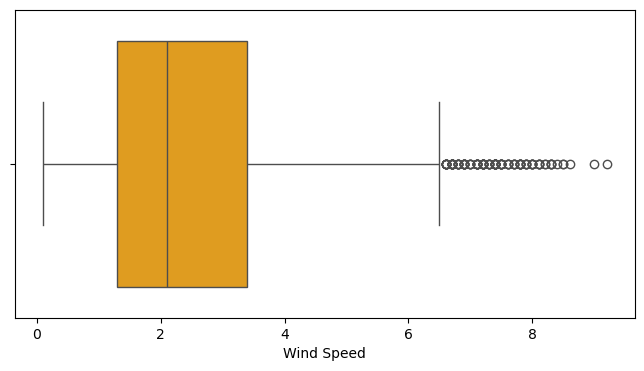

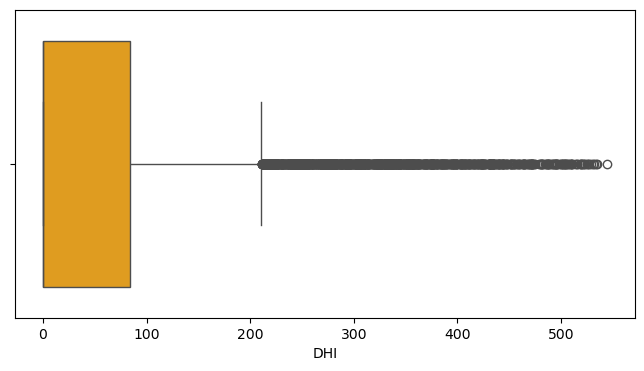

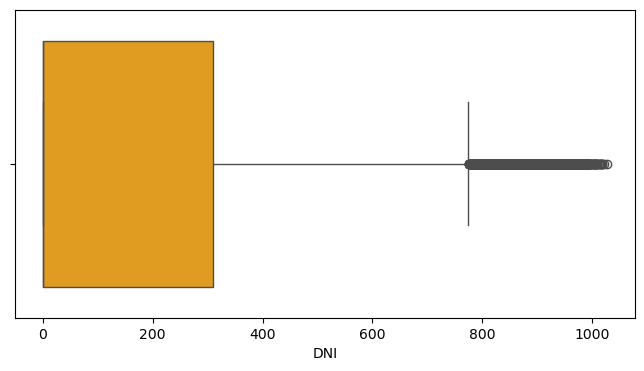

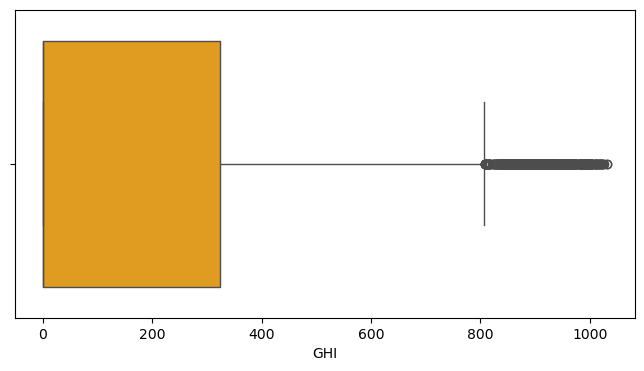

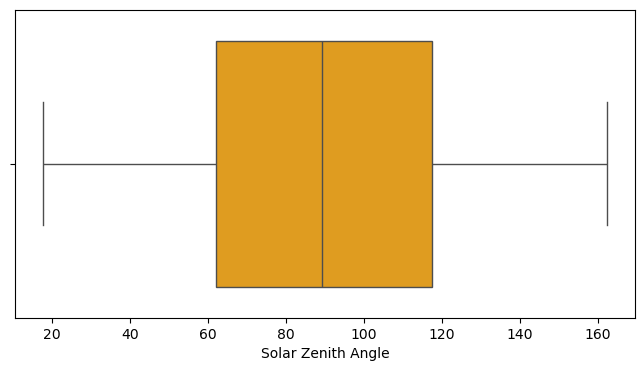

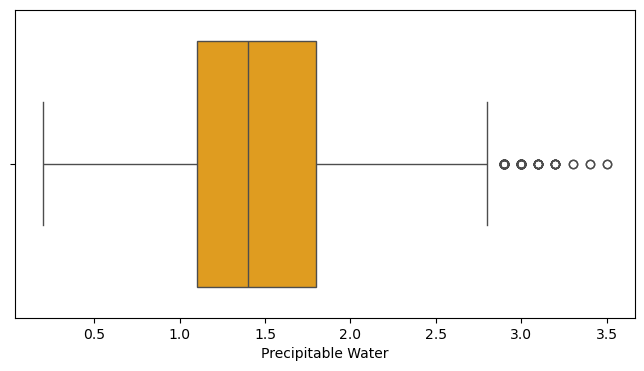

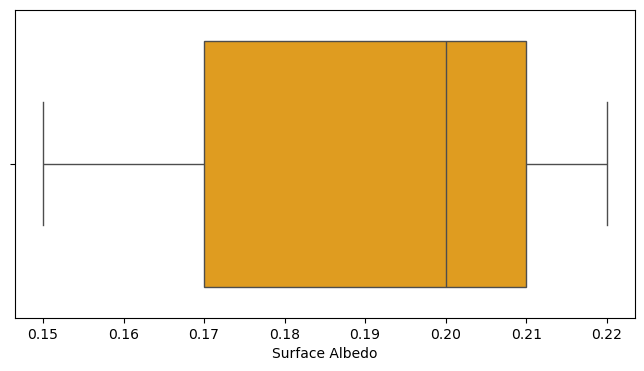

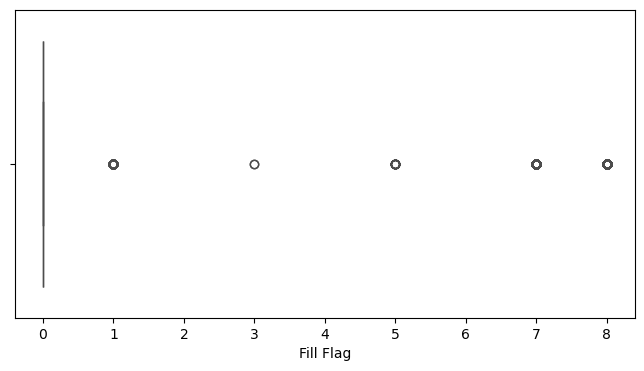

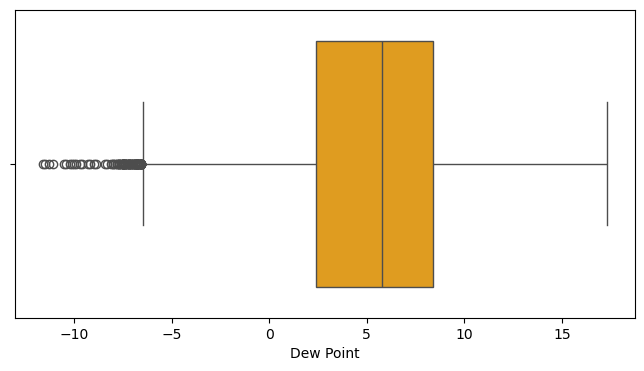

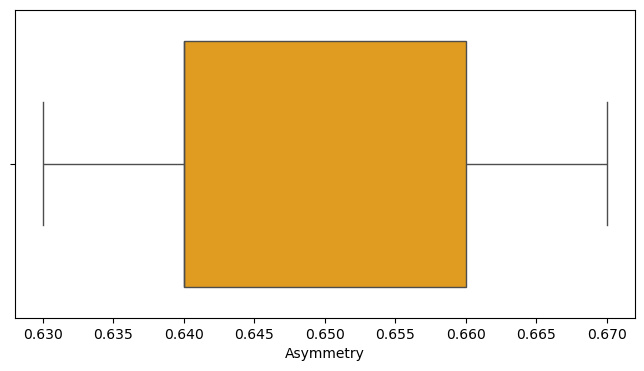

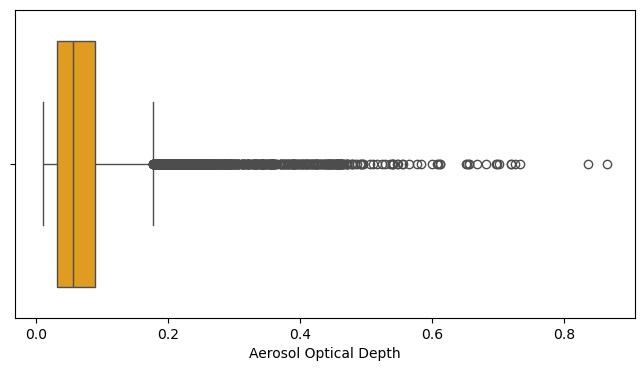

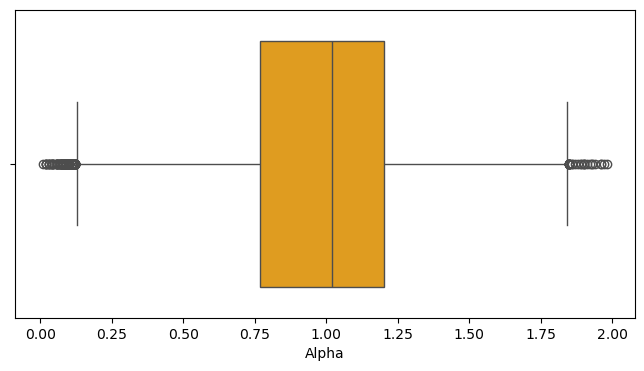

In [57]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
for val in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data,x=val,color='orange')